In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
BSE = yf.download("^BSESN", start = "1998-01-01", end = "2023-12-27")

[*********************100%%**********************]  1 of 1 completed


In [3]:
BSE

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1998-01-01,3658.340088,3711.689941,3658.340088,3694.620117,3694.620117,0
1998-01-02,3704.469971,3739.379883,3701.399902,3719.850098,3719.850098,0
1998-01-05,3745.189941,3792.860107,3736.939941,3739.209961,3739.209961,0
1998-01-06,3724.429932,3727.239990,3684.020020,3719.620117,3719.620117,0
1998-01-07,3715.379883,3745.709961,3658.949951,3683.310059,3683.310059,0
...,...,...,...,...,...,...
2023-12-19,71479.281250,71623.710938,71071.976562,71437.187500,71437.187500,8600
2023-12-20,71647.656250,71913.070312,70302.601562,70506.312500,70506.312500,13200
2023-12-21,69920.890625,70958.710938,69920.390625,70865.101562,70865.101562,8800


In [4]:
BSE.to_csv("BSE_Data.csv")

In [5]:
BSE = pd.read_csv("BSE_Data.csv",parse_dates = ["Date"], index_col = "Date", usecols=["Date", "Close"])

In [6]:
BSE

,Close
Date,
1998-01-01,3694.620117
1998-01-02,3719.850098
1998-01-05,3739.209961
1998-01-06,3719.620117
1998-01-07,3683.310059
...,...
2023-12-19,71437.187500
2023-12-20,70506.312500
2023-12-21,70865.101562


In [7]:
BSE.head()

,Close
Date,
1998-01-01,3694.620117
1998-01-02,3719.850098
1998-01-05,3739.209961
1998-01-06,3719.620117
1998-01-07,3683.310059


In [8]:
BSE.tail()

,Close
Date,
2023-12-19,71437.187500
2023-12-20,70506.312500
2023-12-21,70865.101562
2023-12-22,71106.960938
2023-12-26,71336.796875


In [9]:
BSE.describe()

,Close
count,6402.000000
mean,21496.752780
std,17286.324977
min,2600.120117
25%,5668.717651
50%,17586.269531
75%,30735.026855
max,71483.750000


In [10]:
annual = BSE.resample("A", kind = "period").last()
annual

,Close
Date,
1998,3055.409912
1999,5005.819824
2000,3972.120117
2001,3262.330078
2002,3377.280029
2003,5838.959961
2004,6602.689941
2005,9397.929688
2006,13786.910156


In [11]:
annual ["Return"] = np.log(annual.Close/annual.Close.shift())

In [12]:
annual

,Close,Return
Date,,
1998,3055.409912,NaN
1999,5005.819824,0.493687
2000,3972.120117,-0.231301
2001,3262.330078,-0.196858
2002,3377.280029,0.034629
2003,5838.959961,0.547482
2004,6602.689941,0.122924
2005,9397.929688,0.353012
2006,13786.910156,0.383230


In [13]:
annual.dropna(inplace = True)

In [14]:
annual

,Close,Return
Date,,
1999,5005.819824,0.493687
2000,3972.120117,-0.231301
2001,3262.330078,-0.196858
2002,3377.280029,0.034629
2003,5838.959961,0.547482
2004,6602.689941,0.122924
2005,9397.929688,0.353012
2006,13786.910156,0.383230
2007,20286.990234,0.386260


In [15]:
years = annual.index.size
years

25

In [22]:
windows = [year for year in range (25,0,-1)]
windows

[25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1]

In [23]:
for year in windows:
    annual["{}Y".format(year)] = annual.Return.rolling(year).mean()

In [24]:
annual

,Close,Return,26Y,25Y,24Y,23Y,22Y,21Y,20Y,19Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1999,5005.819824,0.493687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.493687
2000,3972.120117,-0.231301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.131193,-0.231301
2001,3262.330078,-0.196858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021843,-0.214080,-0.196858
2002,3377.280029,0.034629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.025039,-0.131177,-0.081115,0.034629
2003,5838.959961,0.547482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.129528,0.038488,0.128418,0.291056,0.547482
2004,6602.689941,0.122924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.128427,0.055375,0.127044,0.235012,0.335203,0.122924
2005,9397.929688,0.353012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.160511,0.104981,0.172238,0.264512,0.341140,0.237968,0.353012
2006,13786.910156,0.383230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.188351,0.144731,0.207403,0.288256,0.351662,0.286389,0.368121,0.383230
2007,20286.990234,0.386260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.210341,0.174922,0.232954,0.304590,0.358582,0.311357,0.374168,0.384745,0.386260


In [27]:
triangle = annual.drop(columns = ["Close", "Return", "26Y"])

In [28]:
triangle

,25Y,24Y,23Y,22Y,21Y,20Y,19Y,18Y,17Y,16Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.493687
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.131193,-0.231301
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021843,-0.214080,-0.196858
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.025039,-0.131177,-0.081115,0.034629
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.129528,0.038488,0.128418,0.291056,0.547482
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.128427,0.055375,0.127044,0.235012,0.335203,0.122924
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.160511,0.104981,0.172238,0.264512,0.341140,0.237968,0.353012
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.188351,0.144731,0.207403,0.288256,0.351662,0.286389,0.368121,0.383230
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.210341,0.174922,0.232954,0.304590,0.358582,0.311357,0.374168,0.384745,0.386260


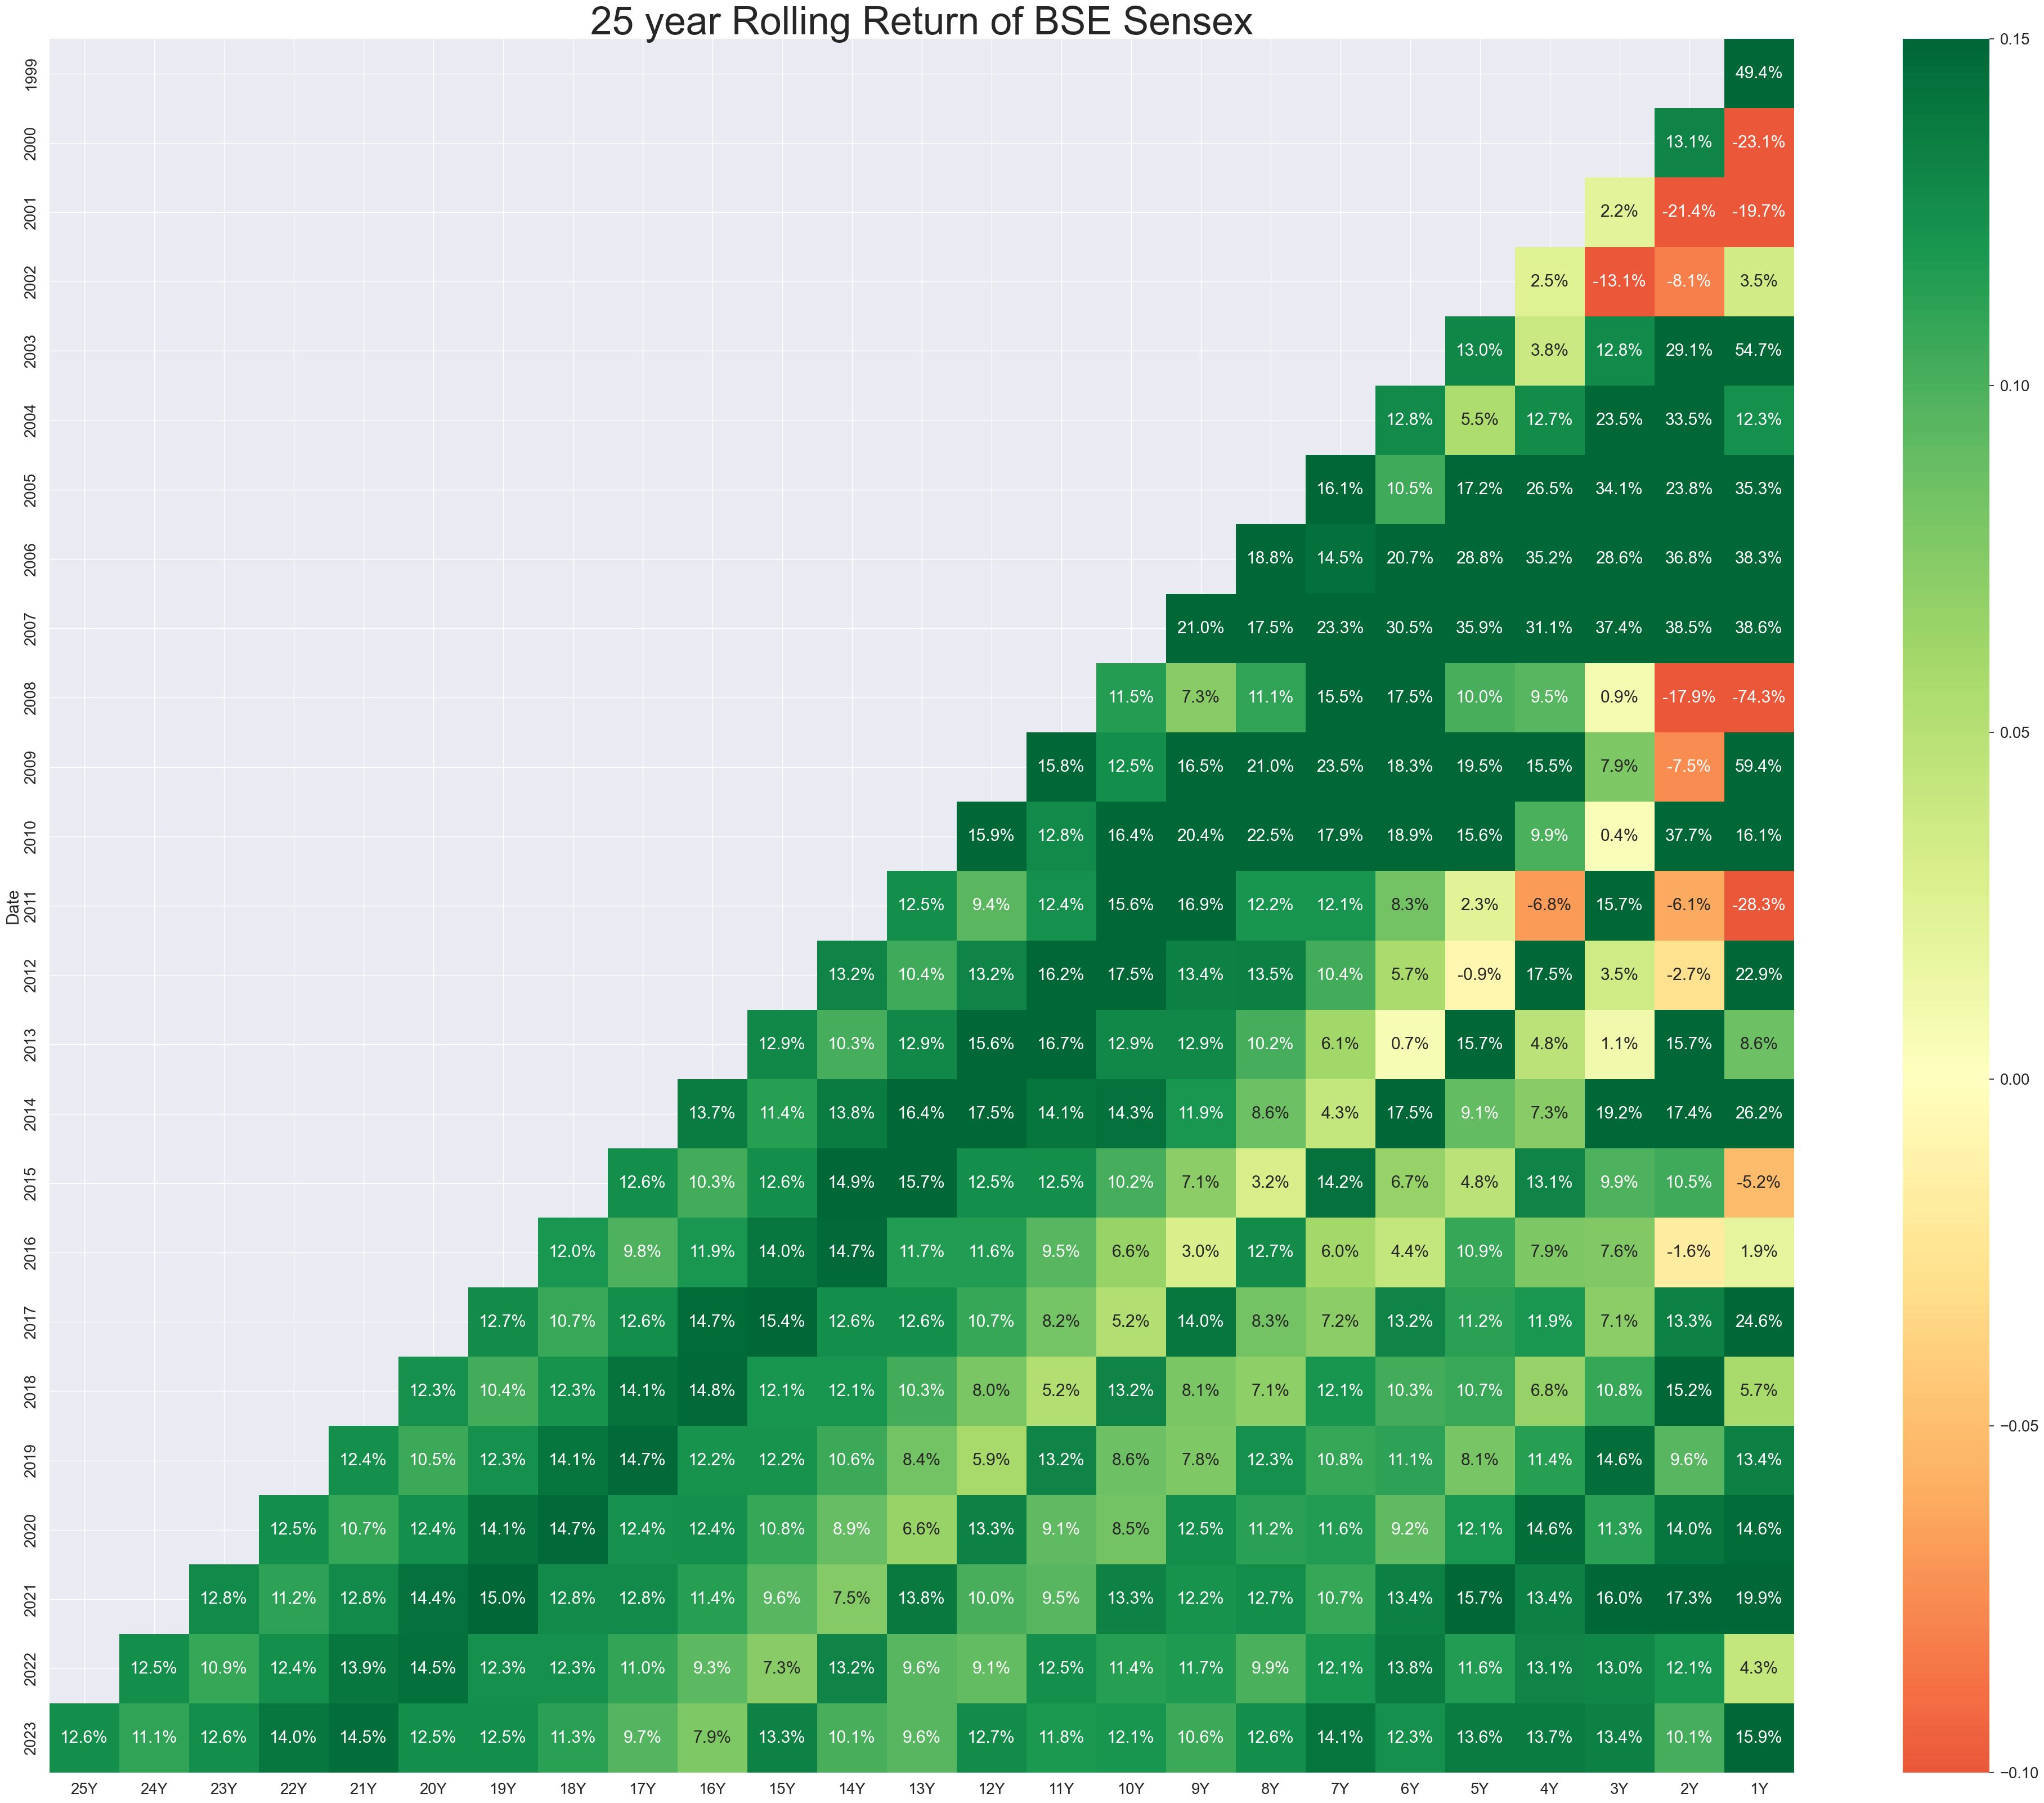

In [38]:
plt.figure(figsize = (50,40))
sns.set(font_scale= 1.8)
sns.heatmap(triangle, annot = True, fmt = ".1%", cmap = "RdYlGn",
            vmin = -0.10, vmax = 0.15, center = 0)
plt.tick_params(axis = "y",labelright = False)
plt.title("25 year Rolling Return of BSE Sensex", fontsize = 50)
plt.show()